# 2. Data visualization

In [4]:
#pip install squarify

In [5]:
# โค้ดใช้ plot graph
import seaborn as sns
import warnings
# โค้ดจัดการตาราง
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import squarify
# set maximum row to unlimit
#pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None) #show entire dataframe

In [6]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 2.1 นำเข้าข้อมูลที่ผ่านการจัดระเบียบมาแล้ว

In [7]:
file_id ='1pJHInigtVtRZkzKBCs33VJNwvPRwDn5w'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data.csv')
dat = pd.read_csv('data.csv')
dat.head()

,Product_id,Product_detail,Amount,Price,Discount,Discount_member,Sale_price,Branch,Date,Invoice_id,Member_id,Gender,category
0,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
1,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
2,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
3,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
4,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink


In [8]:
# แสดงหัวข้อทั้งหมดของฐานข้อมูล
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_id       3210 non-null   int64  
 1   Product_detail   3210 non-null   object 
 2   Amount           3210 non-null   int64  
 3   Price            3210 non-null   float64
 4   Discount         3210 non-null   float64
 5   Discount_member  3210 non-null   float64
 6   Sale_price       3210 non-null   float64
 7   Branch           3210 non-null   object 
 8   Date             3210 non-null   object 
 9   Invoice_id       3210 non-null   int64  
 10  Member_id        3210 non-null   int64  
 11  Gender           3210 non-null   object 
 12  category         3210 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 326.1+ KB


In [9]:
dat.describe()

,Product_id,Amount,Price,Discount,Discount_member,Sale_price,Invoice_id,Member_id
count,3.210000e+03,3210.000000,3210.000000,3210.0,3210.0,3210.000000,3.210000e+03,3.210000e+03
mean,2.277941e+11,1.924611,501.251246,0.0,0.0,501.251246,6.770565e+11,6.243763e+07
std,3.799966e+11,6.536561,2025.141900,0.0,0.0,2025.141900,2.775708e+11,2.259620e+08
min,5.001000e+03,1.000000,0.000000,0.0,0.0,0.000000,1.001014e+11,1.000029e+06
25%,1.105500e+11,1.000000,51.000000,0.0,0.0,51.000000,6.004012e+11,2.000173e+06
50%,2.087230e+11,1.000000,138.500000,0.0,0.0,138.500000,7.003012e+11,2.000276e+06
75%,2.205501e+11,1.000000,360.000000,0.0,0.0,360.000000,9.007011e+11,2.000993e+06
max,8.850017e+12,150.000000,57300.000000,0.0,0.0,57300.000000,9.012011e+11,9.522944e+08


จากข้อมูลเบื้องต้น พบว่าคอลัมน์ของ ราคาส่วนลดมีค่าเฉลี่ยเป็น 0 หมายถึงในสามเดือนร้านค้าทั้งสองสาขาไม่มีโปรโมชันส่วนลดทั้งของลูกค้าทั่วไปและลูกค้าสมาชิก

## 2.2 เช็คข้อมูลยอดขายของแต่ละสาขา

In [10]:
print(dat.Member_id.unique())
len(dat.Member_id.unique())

[  1000029   2000173   2000404   2000986   2000993   2001135   2213348
   3004515  38841706  38846327   1000043   2000202   2000276   2213209
   3011556   3011705  38841531  38846682 952294374]


19

In [11]:
print("Branch A has ",len(dat.Member_id[dat.Branch == 'A'].unique()), " members")
print("Branch B has ",len(dat.Member_id[dat.Branch == 'B'].unique()), " members")

Branch A has  10  members
Branch B has  9  members


In [12]:
salebranch =  dat.groupby(by=['Branch'], as_index=False)['Sale_price'].sum().sort_values('Sale_price',ascending=False)
salebranch

,Branch,Sale_price
1,B,879525.0
0,A,729491.5


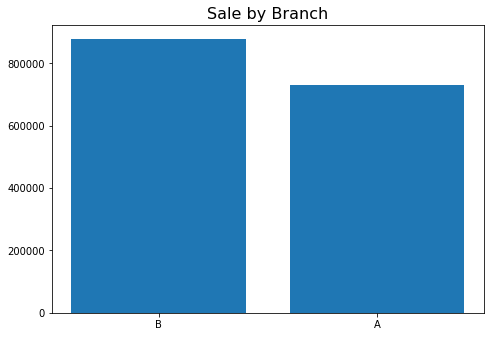

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(salebranch.Branch,salebranch.Sale_price)
ax.set_title('Sale by Branch',fontsize=16)
plt.show()

มีจำนวนสมาชิกทั้งหมด 19 คน จากสาขา A จำนวน 10 คน และ สาขา B จำนวน 9 คน



#### 2.2.1 เช็คยอดซื้อของสมาชิกแต่ละคน

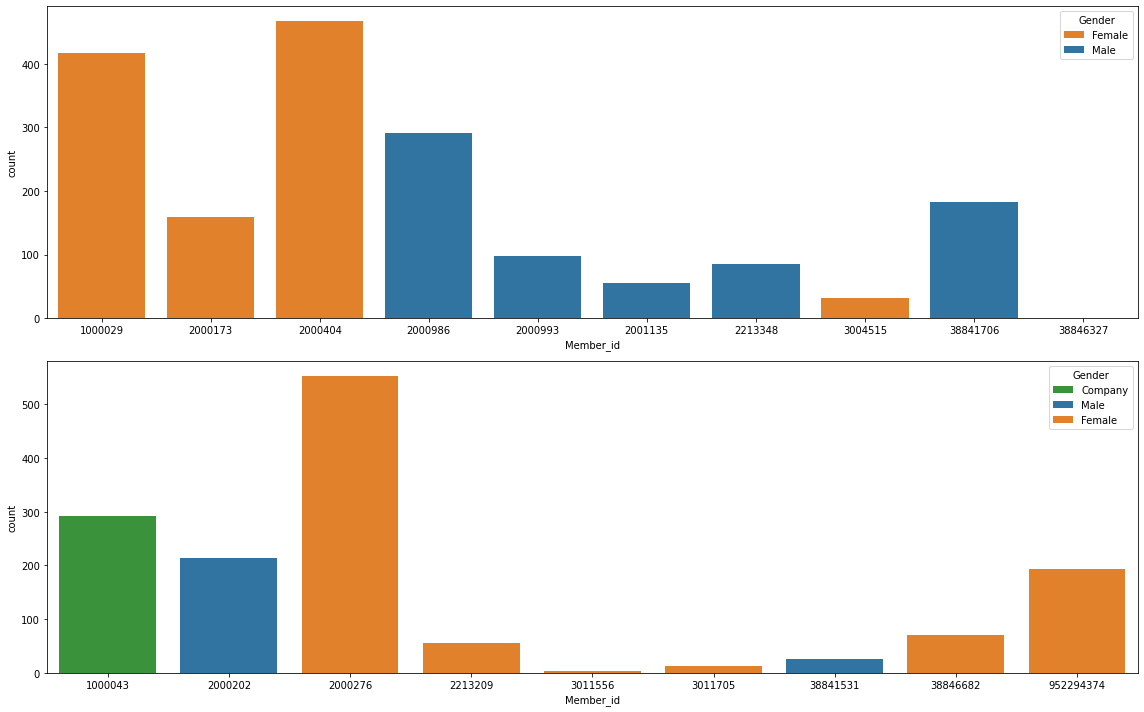

In [14]:
palette_set ={"Male": "C0", "Female": "C1", "Company": "C2"}

fig,ax = plt.subplots(2,1,figsize=(16,10))
sns.countplot('Member_id',data=dat.loc[dat.Branch =='A'],ax=ax[0],hue = 'Gender', dodge=False, palette= palette_set)
sns.countplot('Member_id',data=dat.loc[dat.Branch =='B'],ax=ax[1],hue = 'Gender', dodge=False, palette = palette_set)
plt.tight_layout()

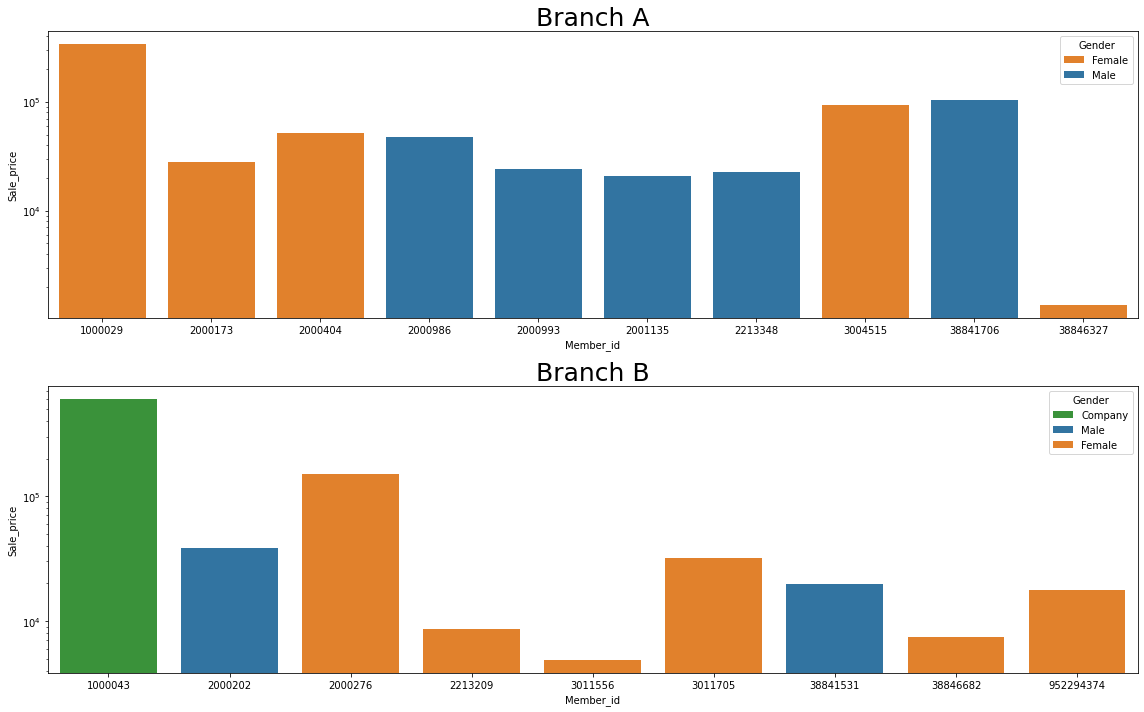

In [15]:
palette_set ={"Male": "C0", "Female": "C1", "Company": "C2"}

fig,ax = plt.subplots(2,1,figsize=(16,10))
sns.barplot(x = 'Member_id', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='A'],ax=ax[0],
            hue = 'Gender',dodge=False, palette= palette_set, ci=None)
sns.barplot(x = 'Member_id', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='B'],ax=ax[1],
            hue = 'Gender', dodge=False, palette = palette_set, ci=None)
ax[0].set(yscale="log")
ax[1].set(yscale="log")
ax[0].set_title('Branch A',fontsize=25)
ax[1].set_title('Branch B',fontsize=25)
plt.tight_layout()

สาขา A สมาชิก 1000029 มียอดซื้อสูงสุด 
สาขา B สมาขิก 1000043 มียอดซื้อสูงสุด​โดย สมาชิกB ลงทะเบียนเป็นบริษัท

#### 2.2.2เช็คยอดขายสินค้าแต่ละประเภท

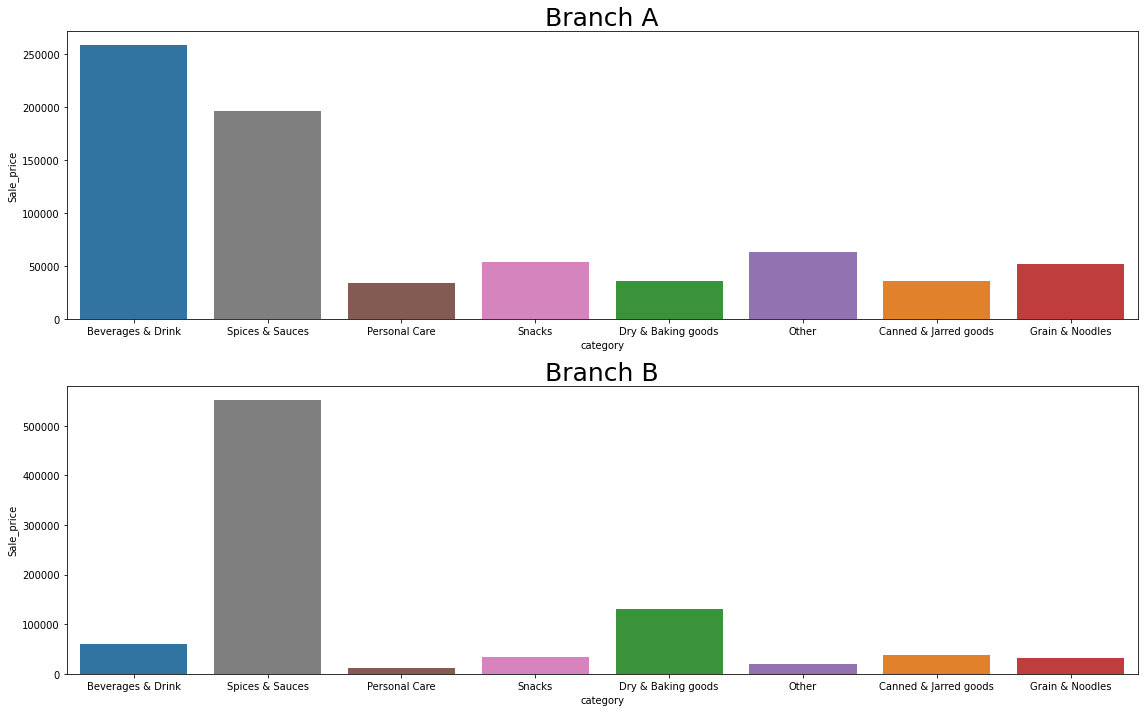

In [16]:
palette_set ={"Beverages & Drink": "C0",
              "Canned & Jarred goods":"C1",
              "Dry & Baking goods":"C2",
              "Grain & Noodles":"C3",
              "Other":"C4",
              "Personal Care": "C5",
              "Snacks":"C6",
              "Spices & Sauces": "C7"}

order = ["Beverages & Drink", "Spices & Sauces",   "Personal Care",
         "Snacks","Dry & Baking goods", "Other","Canned & Jarred goods","Grain & Noodles"]
fig,ax = plt.subplots(2,1,figsize=(16,10))
sns.barplot(x = 'category', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='A'],
            palette = palette_set, order = order, ax=ax[0], ci=None)
sns.barplot(x = 'category', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='B'],
            palette = palette_set, order = order, ax=ax[1], ci=None)

ax[0].set_title('Branch A',fontsize=25)
ax[1].set_title('Branch B',fontsize=25)
plt.tight_layout()

Branch A มียอดขายสินค้าประเภท Beverages & Drink สูงที่สุด รองลงมาคือ Spices & sauces 
Branch B มียอดขาย Spices & Sauces สูงที่สุด 
ตารางด้านล่างแสดงจำนวนและยอดขายของสินค้าแต่ละประเภทในสาขา A และ B

In [17]:
datA = dat.loc[dat.Branch =='A'] #สาขา A
datB = dat.loc[dat.Branch =='B'] # สาขา B



In [18]:
A_cat = datA[['Sale_price','category']].groupby('category').sum()
B_cat = datB[['Sale_price','category']].groupby('category').sum()

cat_df = pd.concat([A_cat, B_cat], axis = 1)
cat_df.columns = ['Sale_A','Sale_B']
cat_df

,Sale_A,Sale_B
category,,
Beverages & Drink,258121.00,60809.0
Canned & Jarred goods,35805.00,37865.0
Dry & Baking goods,35902.00,130671.0
Grain & Noodles,51773.25,31554.0
Other,63600.25,20186.0
Personal Care,34497.00,11586.0
Snacks,54190.00,34108.0
Spices & Sauces,195603.00,552746.0


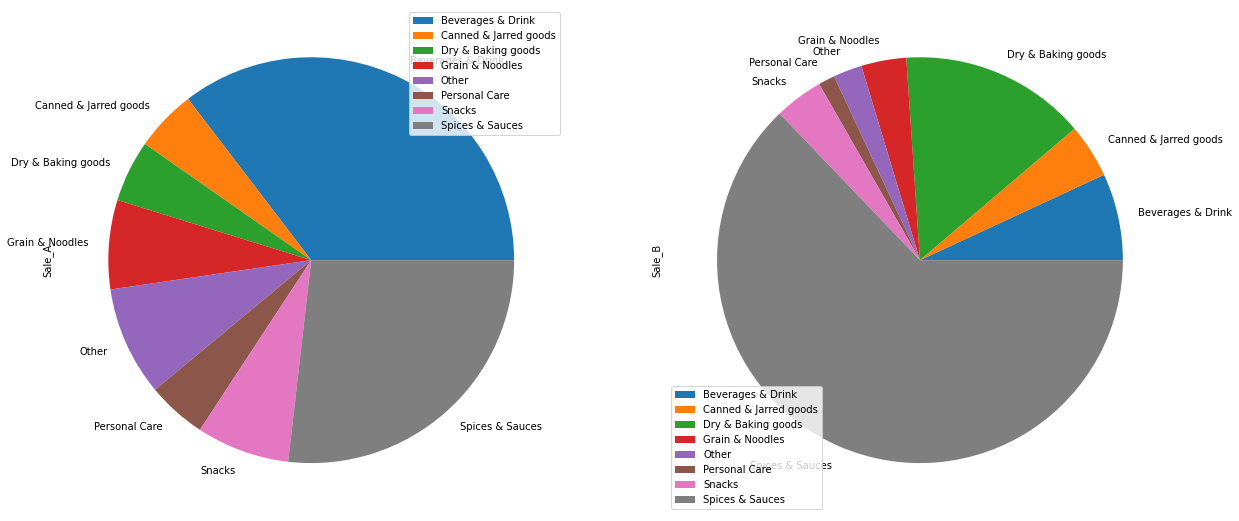

In [19]:
cat_df.plot.pie(subplots=True, figsize=(20, 10))
pass

In [20]:
sbc =  dat.groupby(by=['Branch','category'], as_index=False)['Sale_price'].sum().sort_values('Sale_price',ascending=False)

sbcpv = sbc.pivot(index='category', columns='Branch')
sbcpv



Sale_price          
Branch                         A         B
category                                  
Beverages & Drink      258121.00   60809.0
Canned & Jarred goods   35805.00   37865.0
Dry & Baking goods      35902.00  130671.0
Grain & Noodles         51773.25   31554.0
Other                   63600.25   20186.0
Personal Care           34497.00   11586.0
Snacks                  54190.00   34108.0
Spices & Sauces        195603.00  552746.0

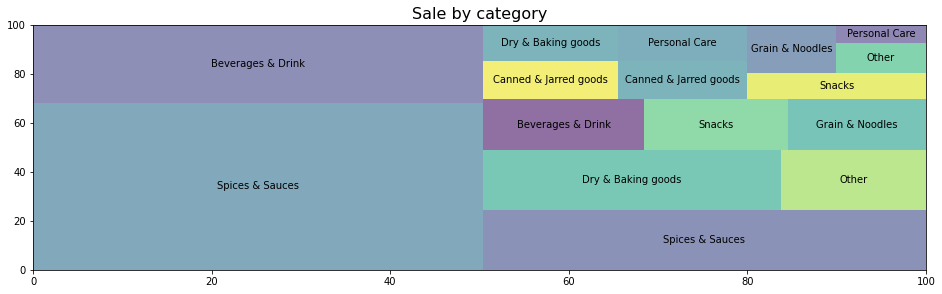

In [21]:
fig = plt.gcf()
fig.set_size_inches(16, 4.5)
cmap = matplotlib.cm.Blues
ax = fig.add_subplot()
ax.set_title('Sale by category',fontsize=16)
data = sbc
squarify.plot(label=data.category,sizes=data.Sale_price, alpha=.6)
plt.show()

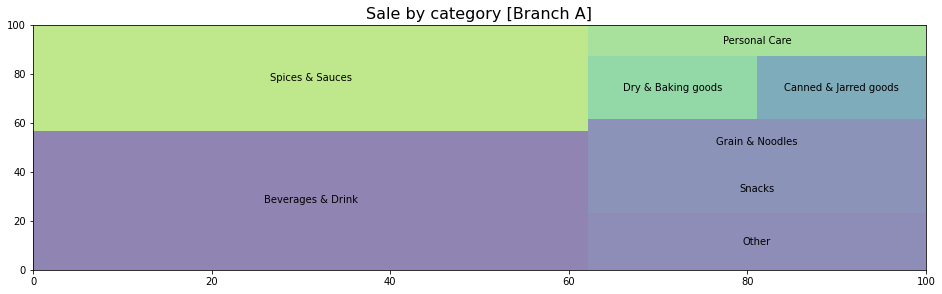

In [22]:
fig = plt.gcf()
fig.set_size_inches(16, 4.5)
ax = fig.add_subplot()
ax.set_title('Sale by category [Branch A]',fontsize=16)
data = sbc[sbc["Branch"]=="A"]
squarify.plot(label=data.category,sizes=data.Sale_price, alpha=.6)
plt.show()

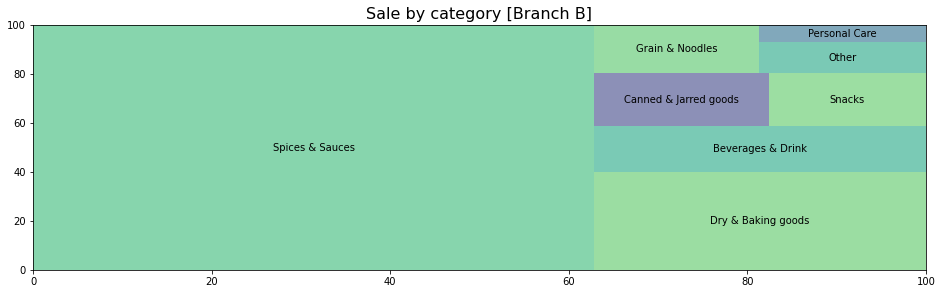

In [23]:
fig = plt.gcf()
fig.set_size_inches(16, 4.5)
ax = fig.add_subplot()
ax.set_title('Sale by category [Branch B]',fontsize=16)
data = sbc[sbc["Branch"]=="B"]
squarify.plot(label=data.category,sizes=data.Sale_price, alpha=.6)
plt.show()

In [24]:
dat.Date = pd.to_datetime(dat.Date, infer_datetime_format=True) 
dat['WeekDay'] = dat['Date'].dt.day_name()
#dat.head()
sbw =  dat.groupby(by=['Branch','WeekDay'], as_index=False)['Sale_price'].sum().sort_values('Sale_price',ascending=False)
sbw

,Branch,WeekDay,Sale_price
13,B,Wednesday,234800.00
9,B,Saturday,209709.00
0,A,Friday,127812.00
6,A,Wednesday,126412.00
5,A,Tuesday,114257.25
1,A,Monday,114098.00
3,A,Sunday,113279.00
11,B,Thursday,110602.00
12,B,Tuesday,109196.00
10,B,Sunday,103079.00


In [25]:
g1 = dat.groupby(["Branch","WeekDay"],as_index=False)['Sale_price'].sum().sort_values('Sale_price',ascending=False)
# g1["Invoice_id"] = g1["Invoice_id"].apply(len)
g1 = g1.pivot('Branch', 'WeekDay', 'Sale_price')
g1

WeekDay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Branch,,,,,,,
A,127812.0,114098.0,52022.25,113279.0,81611.0,114257.25,126412.0
B,31370.0,80769.0,209709.00,103079.0,110602.0,109196.00,234800.0


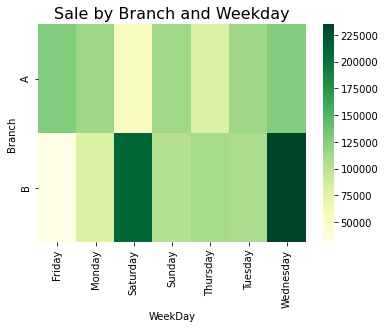

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
sns.heatmap(g1,cmap="YlGn")
ax.set_title('Sale by Branch and Weekday',fontsize=16)
plt.show()

In [27]:
sbg =  dat.groupby(by=['Gender','category'], as_index=False)['Sale_price'].sum().sort_values('Sale_price',ascending=False)
sbgpv = sbg.pivot('category', 'Gender', 'Sale_price')
sbgpv

Gender,Company,Female,Male
category,,,
Beverages & Drink,7930.0,222021.00,88979.0
Canned & Jarred goods,14132.0,50299.00,9239.0
Dry & Baking goods,109982.0,43224.00,13367.0
Grain & Noodles,19214.0,41826.25,22287.0
Other,4922.0,65486.75,13377.5
Personal Care,659.0,23957.00,21467.0
Snacks,23678.0,48353.00,16267.0
Spices & Sauces,419148.0,237812.00,91389.0


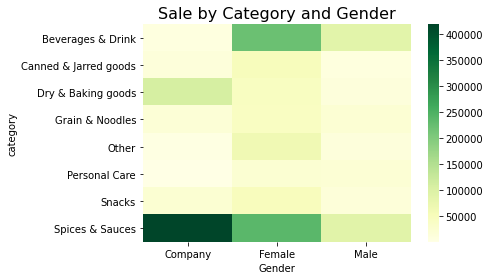

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
sns.heatmap(sbgpv,cmap="YlGn")
ax.set_title('Sale by Category and Gender',fontsize=16)
plt.show()

#### 2.2.3 เปรียบเทียบจำนวนการซื้อของสมาชิกว่ามีสินค้าประเภทไหนบ้าง

In [29]:
A_member = []
for member in datA.Member_id.unique():
  dat_mem = datA.loc[datA.Member_id == member][['Sale_price','category']].groupby('category').sum()
  A_member.append(dat_mem)
A_member = pd.concat(A_member, axis = 1)
A_member.columns = datA.Member_id.unique()

In [30]:
# ตารางยอดซื้อของสมาชิกแต่ละ member_id ในสาขา A 
A_member

,1000029,2000173,2000404,2000986,2000993,2001135,2213348,3004515,38841706,38846327
Beverages & Drink,74623.0,16639.0,19192.00,16897.0,4537.0,1647.0,9733.0,72560.0,40943.0,1350.0
Canned & Jarred goods,22460.0,190.0,1595.00,2795.0,1510.0,NaN,1150.0,3745.0,2360.0,NaN
Dry & Baking goods,22050.0,227.0,333.00,368.0,645.0,10416.0,405.0,NaN,1458.0,NaN
Grain & Noodles,27094.0,1212.0,6671.25,3107.0,805.0,NaN,816.0,2520.0,9548.0,NaN
Other,44129.0,4741.0,3774.75,3232.0,3818.0,1563.0,1409.0,85.0,848.5,NaN
Personal Care,8078.0,616.0,4793.00,5555.0,2871.0,2088.0,3208.0,3600.0,3688.0,NaN
Snacks,24491.0,3537.0,11236.00,8235.0,96.0,46.0,1259.0,3700.0,1590.0,NaN
Spices & Sauces,113077.0,663.0,4178.00,7673.0,9924.0,4830.0,4663.0,7860.0,42735.0,NaN


In [31]:
B_member = []
for member in datB.Member_id.unique():
  dat_mem = datB.loc[datB.Member_id == member][['Sale_price','category']].groupby('category').sum()
  B_member.append(dat_mem)
B_member = pd.concat(B_member, axis = 1)
B_member.columns = datB.Member_id.unique()

In [32]:
# ตารางยอดซื้อของสมาชิกแต่ละ member_id ในสาขา A 
B_member

,1000043,2000202,2000276,2213209,3011556,3011705,38841531,38846682,952294374
Beverages & Drink,7930.0,14195.0,2715.0,6556.0,4350.0,16320.0,1027.0,2631.0,5085.0
Canned & Jarred goods,14132.0,1424.0,20692.0,780.0,NaN,NaN,NaN,NaN,837.0
Dry & Baking goods,109982.0,75.0,17583.0,NaN,NaN,2606.0,NaN,NaN,425.0
Grain & Noodles,19214.0,8011.0,2423.0,209.0,NaN,NaN,NaN,NaN,1697.0
Other,4922.0,2120.0,8894.0,470.0,NaN,NaN,387.0,505.0,2888.0
Personal Care,659.0,3328.0,3490.0,379.0,NaN,NaN,729.0,1582.0,1419.0
Snacks,23678.0,5041.0,112.0,200.0,NaN,NaN,NaN,1625.0,3452.0
Spices & Sauces,419148.0,3909.0,95525.0,65.0,535.0,12875.0,17655.0,1064.0,1970.0


## 2.3 วิเคราะห์ข้อมูลยอดขายวันและเดือน


### 2.3.1 เปรียบเทียบยอดขายสองสาขาในวันจันทร์ถึงอาทิตย์และเดือนสิงหาคมถึงตุลาคม




สร้างตารางที่แสดงวันซื้อ ว่าเป็นวันอะไรของสัปดาห์ วันที่เท่าไร และเดือนอะไร

In [33]:
dat['Date'] = pd.to_datetime(dat['Date'])
dat['weekday'] = (dat['Date']).dt.weekday
dat['day'] = (dat['Date']).dt.day
dat['month'] = (dat['Date']).dt.month
dat['year'] = (dat['Date']).dt.year
dat.head()

,Product_id,Product_detail,Amount,Price,Discount,Discount_member,Sale_price,Branch,Date,Invoice_id,Member_id,Gender,category,WeekDay,weekday,day,month,year
0,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,Saturday,5,1,8,2020
1,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,Saturday,5,1,8,2020
2,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,Saturday,5,1,8,2020
3,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,Saturday,5,1,8,2020
4,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,Saturday,5,1,8,2020


In [34]:
week_df = dat.groupby('Branch')['weekday'].value_counts().unstack()
week_df.columns = ['Mon', 'Tue','Wed','Thur','Fri','Sat','Sun']
week_df

,Mon,Tue,Wed,Thur,Fri,Sat,Sun
Branch,,,,,,,
A,283,267,312,181,217,177,353
B,202,129,164,279,102,334,210


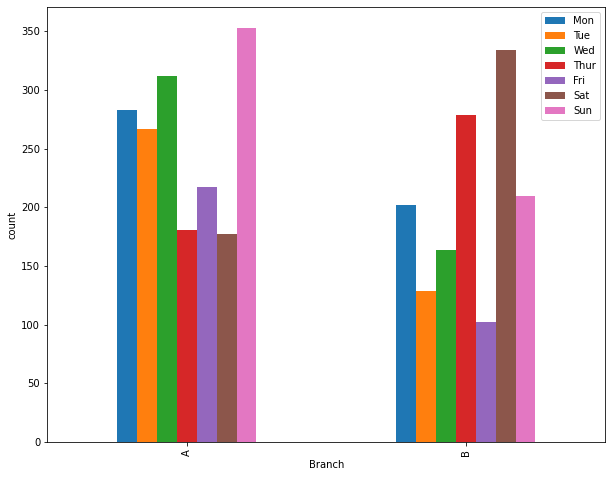

In [35]:
week_df.plot(kind='bar', figsize=(10, 8))
plt.ylabel('count')
plt.show()

สาขา A มียอดขายวันอาทิตย์สูงที่สุด ส่วน สาขา B มียอดขายวันเสาร์มากที่สุด

In [36]:
month_df = dat.groupby('Branch')['month'].value_counts().unstack()
month_df.columns = ['August', 'September','October']
month_df

,August,September,October
Branch,,,
A,871,498,421
B,732,349,339


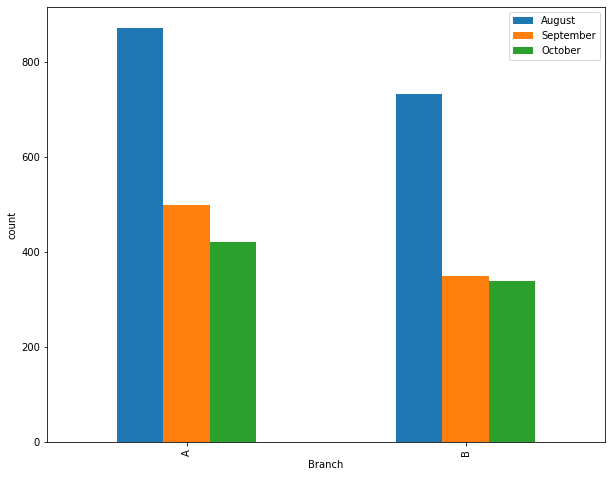

In [37]:
month_df.plot(kind='bar', figsize=(10, 8))
plt.ylabel('count')
plt.show()

เดือนสิงหาคมมียอดขายสูงสุดในสามเดือนทั้งสองสาขา และการซื้อขายมีแนวโน้มลดลงจากเดือนสิงหาคนถึงเดือนตุลาคม

## 2.4 วิเคราะห์ range ราคา ของสินค้าประเภทต่างๆ

---



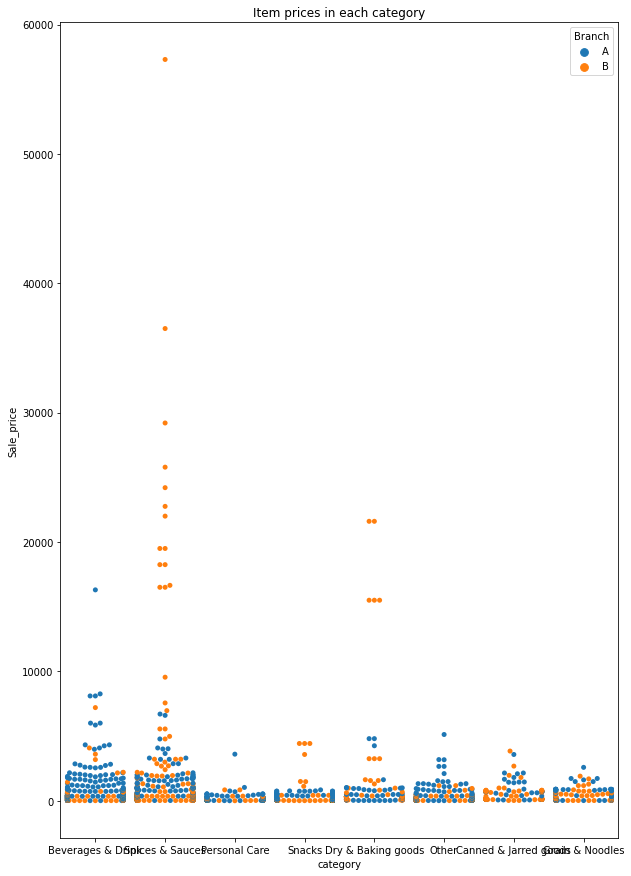

In [38]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.swarmplot(x="category",  y = "Sale_price",  hue = "Branch", data =dat)
ax.set_title("Item prices in each category")
pass

In [39]:
#เช็คราคาสินค้าที่มีราคามากกว่า 10,000
dat[dat.Sale_price > 10000]

,Product_id,Product_detail,Amount,Price,Discount,Discount_member,Sale_price,Branch,Date,Invoice_id,Member_id,Gender,category,WeekDay,weekday,day,month,year
1583,250945011001,AA สิงห์ โซดาวันเวย์ 325มล.,100,16300.0,0.0,0.0,16300.0,A,2020-08-18,901101026759,3004515,Female,Beverages & Drink,Tuesday,1,18,8,2020
1826,223267014001,AA ประจวบ น้ำตาลทรายขาว 50กก.,27,25785.0,0.0,0.0,25785.0,B,2020-08-09,700101128321,1000043,Company,Spices & Sauces,Sunday,6,9,8,2020
1856,223522131002,AA มิตรผล น้ำเชื่อม 1.2กก.,50,18250.0,0.0,0.0,18250.0,B,2020-08-15,700201022277,1000043,Company,Spices & Sauces,Saturday,5,15,8,2020
1893,223522131002,AA มิตรผล น้ำเชื่อม 1.2กก.,80,29200.0,0.0,0.0,29200.0,B,2020-08-29,700201025101,1000043,Company,Spices & Sauces,Saturday,5,29,8,2020
1905,218230041001,AA ยูเอฟเอ็ม แป้งทอดกรอบ 1กก.,50,15500.0,0.0,0.0,15500.0,B,2020-08-30,100101364249,1000043,Company,Dry & Baking goods,Sunday,6,30,8,2020
1911,223267014001,AA ประจวบ น้ำตาลทรายขาว 50กก.,60,57300.0,0.0,0.0,57300.0,B,2020-09-02,700201026039,1000043,Company,Spices & Sauces,Wednesday,2,2,9,2020
1946,223522021072,AA มิตรผล น้ำตาลทรายแดง1กก.,30,16650.0,0.0,0.0,16650.0,B,2020-09-15,100101368835,1000043,Company,Spices & Sauces,Tuesday,1,15,9,2020
1950,223522021060,AA มิตรผล น้ำตาลทรายขาว 1กก.,30,16500.0,0.0,0.0,16500.0,B,2020-09-15,700301223476,1000043,Company,Spices & Sauces,Tuesday,1,15,9,2020
1965,223522021060,AA มิตรผล น้ำตาลทรายขาว 1กก.,44,24200.0,0.0,0.0,24200.0,B,2020-09-17,300201230874,1000043,Company,Spices & Sauces,Thursday,3,17,9,2020
1967,223522131002,AA มิตรผล น้ำเชื่อม 1.2กก.,100,36500.0,0.0,0.0,36500.0,B,2020-09-19,700301224399,1000043,Company,Spices & Sauces,Saturday,5,19,9,2020


พบว่ารายการสินค้าที่มีราคามากกว่า 10000 บาท ส่วนใหญ่จะจัดซื้อโดยบริษัท
